In [1]:
import numpy as np
import sympy as sp

from sumpy.expansion.diff_op import (
    make_identity_diff_op,
)
from collections import namedtuple
DerivativeIdentifier = namedtuple("DerivativeIdentifier", ["mi", "vec_idx"])

from sumpy.recurrence import _make_sympy_vec, get_reindexed_and_center_origin_on_axis_recurrence

from immutabledict import immutabledict
from sumpy.expansion.diff_op import LinearPDESystemOperator

In [ ]:
from test_recurrence_qbx import _create_ellipse
n_p = 10000
sources, centers, normals, density, jacobs, radius = _create_ellipse(n_p, 1.6)

In [7]:
# Define True Solution for Slender Domains, Steinbach
n = 10
r = 1/2
mu_n = 1/(2*n) * (1 + ((1-r)/(1+r))**n)

phi = sp.symbols("phi")
jacob = sp.sqrt(4 * sp.sin(phi)**2 + sp.cos(phi)**2)

t = np.linspace(0, 2 * np.pi, n_p, endpoint=False)
true_sol = mu_n * sp.lambdify(phi, jacob)(t) * density

In [ ]:
from sumpy.array_context import _acf
from sumpy.expansion.local import LineTaylorLocalExpansion
from sumpy.kernel import LaplaceKernel
from test_recurrence_qbx import _qbx_lp_general
actx_factory = _acf
ExpnClass = LineTaylorLocalExpansion

actx = actx_factory()
lknl2d = LaplaceKernel(2)
strengths = jacobs * density
p = 7
qbx_res = _qbx_lp_general(lknl2d, sources, sources, centers,
                                          radius, strengths, p)

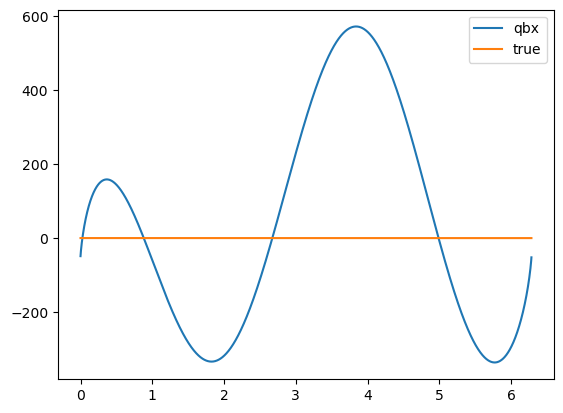

In [ ]:
import matplotlib.pyplot as plt
plt.plot(t, qbx_res, label="qbx")
plt.plot(t, true_sol, label="true")
plt.legend()
plt.show()